In [24]:
import pandas as pd

In [25]:
# Creates a new DataFrame to contain the data from 2010 to 2022
data = {'Year': ['2010/12/31', '2011/12/31', '2012/12/31', '2013/12/31', '2014/12/31', '2015/12/31', '2016/12/31', '2017/12/31', '2018/12/31', '2019/12/31', '2020/12/31', '2021/12/31', '2022/12/31'],
        'Expenditures': [397000000000, 424000000000, 429000000000, 453000000000, 488000000000, 548000000000, 571000000000, 596000000000, 612000000000, 615000000000, 679000000000, 740000000000, 824000000000]}
df = pd.DataFrame(data)

In [26]:
# Convert the "Year" column to datetime objects, accommodating the "xxxx/xx/xx" format
df['Year'] = pd.to_datetime(df['Year'], format='%Y/%m/%d')

In [27]:
# Set "Year" as the index
df.set_index('Year', inplace=True)


In [28]:
# Resample the data to monthly frequency and use linear interpolation to fill in the values
df_monthly = df.resample('M').asfreq()  # Convert to monthly data
df_monthly.interpolate(method='linear', inplace=True)  # Perform linear interpolation

In [29]:
# Resample the data to monthly frequency and use linear interpolation to fill in the values
df_monthly = df.resample('M').asfreq()  # Convert to monthly data
df_monthly.interpolate(method='linear', inplace=True)  # Perform linear interpolation

In [30]:
# Store the monthly data in a csv file, named 'Expenditure_Monthly_data_2010-2022.csv'
df_monthly.reset_index().to_csv('Expenditure_Monthly_data_2010-2022.csv', index=False)

In [31]:
from prophet import Prophet
import matplotlib.pyplot as plt

In [32]:
#Setting the display size
pd.set_option('display.width', 300)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [33]:
# Columns Editing
df_monthly = df_monthly.reset_index()  # Reset the index
df_monthly = df_monthly.rename(columns={'Year':'ds','Expenditures':'y'}) # Rename columns to the ones that Prophet require.
# Note: Prophet requires the date to be named as 'ds', and targeted data as 'y'
print(df_monthly.head())

          ds             y
0 2010-12-31  3.970000e+11
1 2011-01-31  3.992500e+11
2 2011-02-28  4.015000e+11
3 2011-03-31  4.037500e+11
4 2011-04-30  4.060000e+11


In [34]:
# Modeling
model = Prophet()  # Create the model
model.fit(df_monthly)      # Train the model

12:05:00 - cmdstanpy - INFO - Chain [1] start processing
12:05:00 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Create a new dataframe for next ten years
future = model.make_future_dataframe(periods = 365 *10)

In [36]:
# Forecasting
forecast = model.predict(future)

In [37]:
# Store the forecasted data into a new csv file named 'forecast_data_Medicaid_Expenditure.csv'
forecast_data= forecast.rename(columns = {'ds':'date'})
forecast_data.reset_index().to_csv('Expenditure_Monthly_data_2010-2022.csv', index=False)

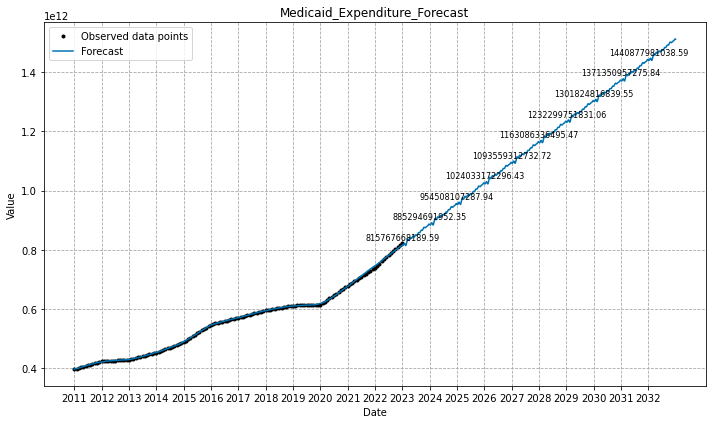

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'ds' and 'y' columns of your history and forecast dataframes to pandas Series
model_history_ds = pd.Series(model.history['ds'])
model_history_y = pd.Series(model.history['y'])
forecast_ds = pd.Series(forecast['ds'])

# Convert the pandas objects to NumPy arrays
model_history_ds_array = model_history_ds.to_numpy()
model_history_y_array = model_history_y.to_numpy()
forecast_ds_array = forecast_ds.to_numpy()
forecast_yhat_array = forecast['yhat'].to_numpy()  # Convert the 'yhat' column to a numpy array

# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(model_history_ds_array, model_history_y_array, 'k.', label='Observed data points')

# Plot the forecast
plt.plot(forecast_ds_array, forecast_yhat_array, ls='-', c='#0072B2', label='Forecast')

# Beautifying the plot
plt.title('Medicaid_Expenditure_Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

# Adding a grid
plt.grid(True, which="both", ls="--", c='0.65')

# Add year labels for x-axis
years = pd.date_range(start=min(model_history_ds_array), end=max(forecast_ds_array), freq='YS')  # Extracting years
plt.xticks(years, years.strftime('%Y'))  # Setting year labels

# Annotate the Medicaid expenditure values for different years
for year in years:
    if year in model_history_ds_array:
        idx = np.where(model_history_ds_array == year)[0][0]
        value = model_history_y_array[idx]
        plt.annotate(f"{value:.2f}", (year, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
    elif year in forecast_ds_array:
        idx = np.where(forecast_ds_array == year)[0][0]
        value = forecast_yhat_array[idx]
        plt.annotate(f"{value:.2f}", (year, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Adjusting the layout to fit everything properly
plt.tight_layout()

# Add a legend
plt.legend()

# Show the plot
plt.show()